## Section 0: Introduction/Business Problem

### Brief Description:


1. Business Problem: An Italian Restaurant looking to expand into new geographical locations and Franchise.
2. Audience: Fine Dining Restaurant Owner or Market Researcher
3. Goal: To evaluate and explore San Diego California as a potential option to open a franchise location

## Section 1: Data Requirements

### Datasets

1. Boston, MA - Restaurants in city along with details.
<br />
a. Rating
<br />
b. Quantity per square mile
<br />
c. Type of business
<br />
d. Location


1. A full report consisting of all of the following components (15 marks):
* Introduction where you discuss the business problem and who would be interested in this project.
* Data where you describe the data that will be used to solve the problem and the source of the data.
* Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
* Results section where you discuss the results.
* Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
* Conclusion section where you conclude the report.

## Section 2: Methodology

#### Pulling/setting up data
Using the foursquare api we are going to searh Itailian restaurants in Boston, MA. Setting radius to 100 miles. Adding features to the dataset such as rating and any other features foursquare api allows to evaluate/compare between restaurants in the area.

#### Explore the dataset:
1. Creating histogram by categories to get an idea of the varying types of italian food in the surrounding area.
<br /> 2. Plotting restaurants in the surrounding area to visualize the density of the area.

#### Exploratory data analysis
Adding target variables to the dataset. Adding rating feature to the base dataset.
<br />
Relationship between type of service and rating.








## Section 3: Coding

### Importing needed libraries/packages

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [4]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    certifi:         2020.4.5.1-py36h9f0ad1d_0 conda-forge --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h516909a_0         conda-forge --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91ea838_1                    --> 0.

### Credentials needed to access the data/api

In [246]:
CLIENT_ID = '55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS' # your Foursquare ID
CLIENT_SECRET = 'N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS
CLIENT_SECRET:N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP


In [373]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Center: ',latitude, longitude)

#Defining Search Query
search_query = 'Italian'
radius = 1000

#full url to use
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

#getting results from web
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe and preview dataframe
df = json_normalize(venues)
#dimensions
print('Dimensions of dataset: ',df.shape)
df


Center:  40.7127281 -74.0060152
Dimensions of dataset:  (23, 25)


,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4a4560a7f964a5201aa81fe3,2 Gold St,...,"[2 Gold St (at Maiden Ln.), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.7076335455641, 'lng': -74.00699585960496}]",40.707634,-74.006996,NaN,10038,NY,Harry's Italian Pizza Bar,v-1589766829,77559825
1,"[{'id': '4bf58dd8d48988d190941735', 'name': 'History Museum', 'pluralName': 'History Museums', 'shortName': 'History Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4b9d4c67f964a5206ca136e3,155 Mulberry St,...,"[155 Mulberry St (at Grand St), New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.71919065572268, 'lng': -73.99737599769244}]",40.719191,-73.997376,NaN,10013,NY,Italian American Museum Of New York,v-1589766829,66342615
2,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}]",286355,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/pisillo-97-nassau-st-new-york/286355?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=286355,False,528bf16711d2b7722da6b51c,97 Nassau St,...,"[97 Nassau St (at Ann St), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.710530084460785, 'lng': -74.00752571804911}]",40.710530,-74.007526,NaN,10038,NY,Pisillo Italian Panini,v-1589766829,105457747
3,"[{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4e4c4d28bd413c4cc66857a5,42 Broadway,...,"[42 Broadway, New York, NY 10004, United States]","[{'label': 'display', 'lat': 40.710509099999996, 'lng': -74.00827615}]",40.710509,-74.008276,NaN,10004,NY,Caruso's Italian Restaurant,v-1589766829,NaN
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4fa862b3e4b0ebff2f749f06,225 Murray St,...,"[225 Murray St, New York, NY 10282, United States]","[{'label': 'display', 'lat': 40.71521779064671, 'lng': -74.01473940209351}, {'label': 'entrance', 'lat': 40.715361, 'lng': -74.014975}]",40.715218,-74.014739,NaN,10282,NY,Harry's Italian Pizza Bar,v-1589766829,NaN
5,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,588a4316326c5a4b60559f17,NaN,...,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.71049280792626, 'lng': -74.00754611675153}]",40.710493,-74.007546,NaN,NaN,NY,Pisillo Italian Cafe,v-1589766829,NaN
6,"[{'id': '4d4b7105d754a06374d81259', 'name': 'Food', 'pluralName': 'Food', 'shortName': 'Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]",NaN,N

In [248]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df_filtered = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]
df_filtered['Count'] =1

cat_filt = ['Café','Food','Food Truck','Italian Restaurant','Pizza Place','Sandwich Place']
df_filtered = df_filtered[df_filtered.categories.isin(cat_filt)]

df_filtered= df_filtered.reset_index(drop=True)


In [264]:
df_filtered['rating']=0
df_filtered['likes']=0
df_filtered['tier']=0
df_filtered['tips']=0
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,...,lng,neighborhood,postalCode,state,id,Count,rating,likes,tier,tips
0,Harry's Italian Pizza Bar,Italian Restaurant,2 Gold St,US,New York,United States,at Maiden Ln.,573,"[2 Gold St (at Maiden Ln.), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.7076335455641, 'lng': -74.00699585960496}]",...,-74.006996,NaN,10038,NY,4a4560a7f964a5201aa81fe3,1,0,0,0,0
1,Pisillo Italian Panini,Sandwich Place,97 Nassau St,US,New York,United States,at Ann St,275,"[97 Nassau St (at Ann St), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.710530084460785, 'lng': -74.00752571804911}]",...,-74.007526,NaN,10038,NY,528bf16711d2b7722da6b51c,1,0,0,0,0
2,Caruso's Italian Restaurant,Italian Restaurant,42 Broadway,US,New York,United States,NaN,312,"[42 Broadway, New York, NY 10004, United States]","[{'label': 'display', 'lat': 40.710509099999996, 'lng': -74.00827615}]",...,-74.008276,NaN,10004,NY,4e4c4d28bd413c4cc66857a5,1,0,0,0,0
3,Harry's Italian Pizza Bar,Pizza Place,225 Murray St,US,New York,United States,NaN,786,"[225 Murray St, New York, NY 10282, United States]","[{'label': 'display', 'lat': 40.71521779064671, 'lng': -74.01473940209351}, {'label': 'entrance', 'lat': 40.715361, 'lng': -74.014975}]",...,-74.014739,NaN,10282,NY,4fa862b3e4b0ebff2f749f06,1,0,0,0,0
4,Pisillo Italian Cafe,Café,NaN,US,New York,United States,NaN,280,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.71049280792626, 'lng': -74.00754611675153}]",...,-74.007546,NaN,NaN,NY,588a4316326c5a4b60559f17,1,0,0,0,0
5,Conca Cucina Italian Restaurant,Food,63 W Broadway,US,New York,United States,NaN,374,"[63 W Broadway, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.714484000000006, 'lng': -74.00980600000001}]",...,-74.009806,NaN,10007,NY,4f3232e219836c91c7bfde94,1,0,0,0,0
6,Italian Food Center,Italian Restaurant,161 Mulberry St,US,New York,United States,at Grand St.,1057,"[161 Mulberry St (at Grand St.), New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.719589, 'lng': -73.997339}, {'label': 'entrance', 'lat': 40.719579, 'lng': -73.997296}]",...,-73.997339,NaN,10013,NY,51a63ef7498e9eedb94e0c5f,1,0,0,0,0
7,Carmine's Italian Seafood,Italian Restaurant,140 Beekman St,US,New York,United States,NaN,658,"[140 Beekman St, New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.707375, 'lng': -74.0027}]",...,-74.002700,NaN,10038,NY,4be0ac9398f2a593aa10c35a,1,0,0,0,0
8,Di So's Italian Food Truck,Italian Restaurant,NaN,US,New York,United States,NaN,999,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.70397251406873, 'lng': -74.00862679659664}]",...,-74.008627,Financial District,NaN,NY,51e245e8498eb19e2e908b76,1,0,0,0,0
9,Diva italian resturant,Italian Restaurant,341 W Broadway,US,New York,United States,None,1166,"[341 W Broadway (None), New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.72306551231227, 'lng': -74.00372874071756}, {'label': 'entrance', 'lat': 40.722538, 'lng': -74.003473}]",...,-74.003729,NaN,10013,NY,4f779e12e4b08e5a67d80bb4,1,0,0,0,0


In [265]:
for ind in df_filtered.index:
    venue_id=df_filtered['id'][ind]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    print('venue id:',venue_id,'URL: ',url)
    result = requests.get(url).json()
    #attributes
    try:
        rating = result['response']['venue']['rating']
    except:
        rating = 0
    try:
        likes = result['response']['venue']['likes']['count']
    except:
        likes=0
    try:
        tier = result['response']['venue']['price']['tier']
    except:
        tier=0
    try:
        tips = result['response']['venue']['stats']['tipCount']
    except:
        tips=0
    print('venue id:',venue_id,rating,likes,tier,tips)
    #adding to df
    df_filtered['rating'][ind]=rating
    df_filtered['likes'][ind]=likes
    df_filtered['tier'][ind]=tier
    df_filtered['tips'][ind]=tips


venue id: 4a4560a7f964a5201aa81fe3 URL:  https://api.foursquare.com/v2/venues/4a4560a7f964a5201aa81fe3?client_id=55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS&client_secret=N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP&v=20180604
venue id: 4a4560a7f964a5201aa81fe3 7.9 317 3 141


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying

venue id: 528bf16711d2b7722da6b51c URL:  https://api.foursquare.com/v2/venues/528bf16711d2b7722da6b51c?client_id=55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS&client_secret=N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP&v=20180604
venue id: 528bf16711d2b7722da6b51c 9.1 291 2 93
venue id: 4e4c4d28bd413c4cc66857a5 URL:  https://api.foursquare.com/v2/venues/4e4c4d28bd413c4cc66857a5?client_id=55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS&client_secret=N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP&v=20180604
venue id: 4e4c4d28bd413c4cc66857a5 0 3 3 0
venue id: 4fa862b3e4b0ebff2f749f06 URL:  https://api.foursquare.com/v2/venues/4fa862b3e4b0ebff2f749f06?client_id=55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143QQ5NSEOUS&client_secret=N2FH3ILQALE3VZGGDDZOXDYMABNLW2J3HCAO5LYC5FHUDFSP&v=20180604
venue id: 4fa862b3e4b0ebff2f749f06 6.4 120 2 57
venue id: 588a4316326c5a4b60559f17 URL:  https://api.foursquare.com/v2/venues/588a4316326c5a4b60559f17?client_id=55YSQB1EWFS5N1OCVMGPGRLFSMYURP14OGH2143Q

In [362]:

enc=pd.DataFrame(df_filtered['categories'].unique())
enc['encoding']=0
enc['categories']=pd.DataFrame(df_filtered['categories'].unique())
enc=enc.drop([0],axis=1)

for i in enc.index:
    enc['encoding'][i]=i+1
enc

df_filtered['encoding_category']=0
print(enc)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   encoding          categories
0  1         Italian Restaurant
1  2         Sandwich Place    
2  3         Pizza Place       
3  4         Café              
4  5         Food              


In [363]:

for i in df_filtered.index:
    for j in enc.index:
        if df_filtered['categories'][i]==enc['categories'][j]:
            df_filtered['encoding_category'][i]=enc['encoding'][j]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [401]:
#describing venues
df_filtered.describe()

,distance,lat,lng,Count,rating,likes,tier,tips,encoding_category
count,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000
mean,724.705882,40.714316,-74.004069,1.0,2.823529,49.588235,2.117647,21.352941,1.705882
std,345.962383,0.005452,0.005906,0.0,3.574830,100.351295,0.992620,40.140287,1.263166
min,275.000000,40.703973,-74.014739,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,374.000000,40.710493,-74.008276,1.0,0.000000,1.000000,2.000000,0.000000,1.000000
50%,786.000000,40.715218,-74.006996,1.0,0.000000,3.000000,2.000000,1.000000,1.000000
75%,999.000000,40.718590,-73.997685,1.0,6.000000,29.000000,2.000000,19.000000,2.000000
max,1166.000000,40.723066,-73.995058,1.0,9.000000,317.000000,4.000000,141.000000,5.000000


In [402]:
#summarizing by category
df_cat = df_filtered[['categories','encoding_category','distance','rating','likes','tier','tips']].groupby('categories').mean()
df_cat

,encoding_category,distance,rating,likes,tier,tips
categories,,,,,,
Café,4.0,280.000000,8.000000,12.000000,1.0,5.000000
Food,5.0,374.000000,0.000000,1.000000,0.0,0.000000
Italian Restaurant,1.0,800.583333,2.083333,34.833333,2.5,17.333333
Pizza Place,3.0,892.000000,3.000000,60.500000,1.5,28.500000
Sandwich Place,2.0,275.000000,9.000000,291.000000,2.0,93.000000


In [403]:
correlation = df_filtered[['encoding_category','rating','likes','tier','tips']].corr(method='pearson')
correlation

,encoding_category,rating,likes,tier,tips
encoding_category,1.000000,0.153878,-0.010876,-0.718379,-0.042200
rating,0.153878,1.000000,0.666879,0.129510,0.683849
likes,-0.010876,0.666879,1.000000,0.165534,0.977431
tier,-0.718379,0.129510,0.165534,1.000000,0.205950
tips,-0.042200,0.683849,0.977431,0.205950,1.000000


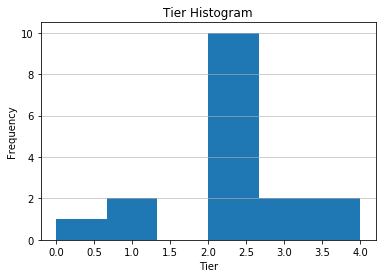

The average tier:  2.1176470588235294


In [404]:
plt.hist(x=df_filtered['tier'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tier')
plt.ylabel('Frequency')
plt.title('Tier Histogram')
plt.show()
print('The average tier: ',df_filtered['tier'].mean())

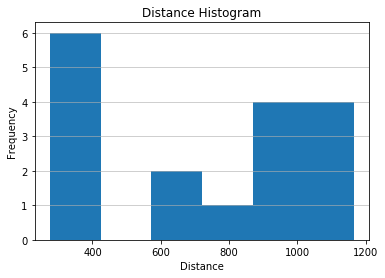

The average distance from center:  724.7058823529412


In [405]:
plt.hist(x=df_filtered['distance'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()
print('The average distance from center: ',df_filtered['distance'].mean())

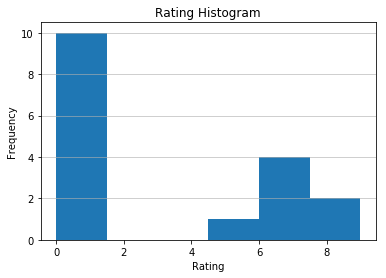

The average rating:  2.823529411764706


In [406]:
plt.hist(x=df_filtered['rating'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram')
plt.show()
print('The average rating: ',df_filtered['rating'].mean())

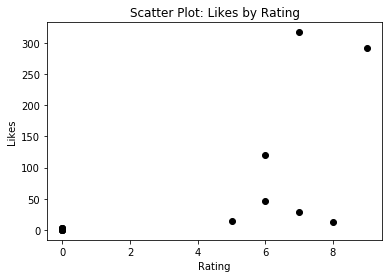

In [414]:
plt.plot(df_filtered['rating'], df_filtered['likes'], 'o', color='black');
plt.xlabel('Rating')
plt.ylabel('Likes')
plt.title('Scatter Plot: Likes by Rating')
plt.show()


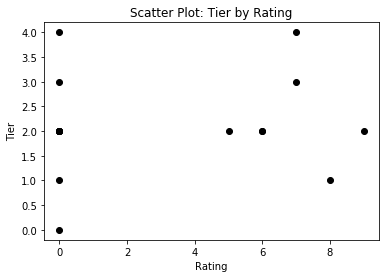

In [427]:
plt.plot(df_filtered['rating'], df_filtered['tier'], 'o', color='black');
plt.xlabel('Rating')
plt.ylabel('Tier')
plt.title('Scatter Plot: Tier by Rating')
plt.show()


In [408]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the New York City
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map
